# Capstone 3: Unsupervised learning

## instructions
 
For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

How do you achieve the following using clustering techniques?

    1. Determine classifiation of pulsar (one of two). 

Next steps:

    1. Find a dataset of interest. 

    2. Explore the data. You should understand how it was gathered, what's in it, and what the variables look like.

    3. Try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: 
    -how do clustering and modeling compare? 
    -What are the advantages of each? 
    -Why would you want to use one over the other?

This will ultimately include the following deliverables:

    A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint).
    A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.

Conduct the analysis in Jupyter. Provide a complete research report using the framework introduced in the previous module. The report should include compelling visualizations and actionable insights, telling the story to your intended audience. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking.

Rather than create a deck in a presentation tool like PowerPoint or Google Slides, we will use Jupyter’s built-in slide deck capabilities. This cuts down on the time-consuming and error-prone process of copying-and-pasting into an external program. The presentation is also fully reproducible.

On the day of your presentation, an evaluator from the Thinkful educator team will introduce you, and then you'll give your presentation. Afterward, the evaluator will ask you follow up questions and will grade your performance on your presentation. Members of the audience will also be encouraged to ask follow up questions.

Be prepared to talk about:

    Your end-user and the value your project provides to them.
    Quantifiable results based on the research you’ve conducted.
    The visuals you chose and what they represent for your research.
    Next steps you'd take to expand on your work.
    A specified research question your model addresses.
    How you chose your model specification and what alternatives you compared it to.
    The practical uses of your model for an audience of interest.
    Any weak points or shortcomings of your model.

## data source

https://data.world/uci/htru2/workspace/file?filename=HTRU_2.csv


Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South). The data set here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Candidates are stored in separate rows. Each row lists the 8 continuous variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

## data set
Attribute Information:  
**column_a:** Mean of the integrated profile;    
**column_b:** Standard deviation of the integrated profile;    
**column_c:** Excess kurtosis of the integrated profile;    
**column_d:** Skewness of the integrated profile;    
**column_e:** Mean of the DM-SNR curve;    
**column_f:** Standard deviation of the DM-SNR curve;    
**column_g:** Excess kurtosis of the DM-SNR curve;   
**column_h:** Skewness of the DM-SNR curve;   
**column_i:** Class  

HTRU 2 Summary:    
**17,898 total** examples;   
**1,639 positive** examples;    
**16,259 negative** examples

## import, clean, examine data

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\htru_2.csv')   

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,False
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
column_a    17898 non-null float64
column_b    17898 non-null float64
column_c    17898 non-null float64
column_d    17898 non-null float64
column_e    17898 non-null float64
column_f    17898 non-null float64
column_g    17898 non-null float64
column_h    17898 non-null float64
column_i    17898 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [6]:
df['column_i'] = df['column_i'].astype(int)

In [7]:
df.isnull().sum()

column_a    0
column_b    0
column_c    0
column_d    0
column_e    0
column_f    0
column_g    0
column_h    0
column_i    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
column_a    17898 non-null float64
column_b    17898 non-null float64
column_c    17898 non-null float64
column_d    17898 non-null float64
column_e    17898 non-null float64
column_f    17898 non-null float64
column_g    17898 non-null float64
column_h    17898 non-null float64
column_i    17898 non-null int32
dtypes: float64(8), int32(1)
memory usage: 1.2 MB


In [9]:
df.describe()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


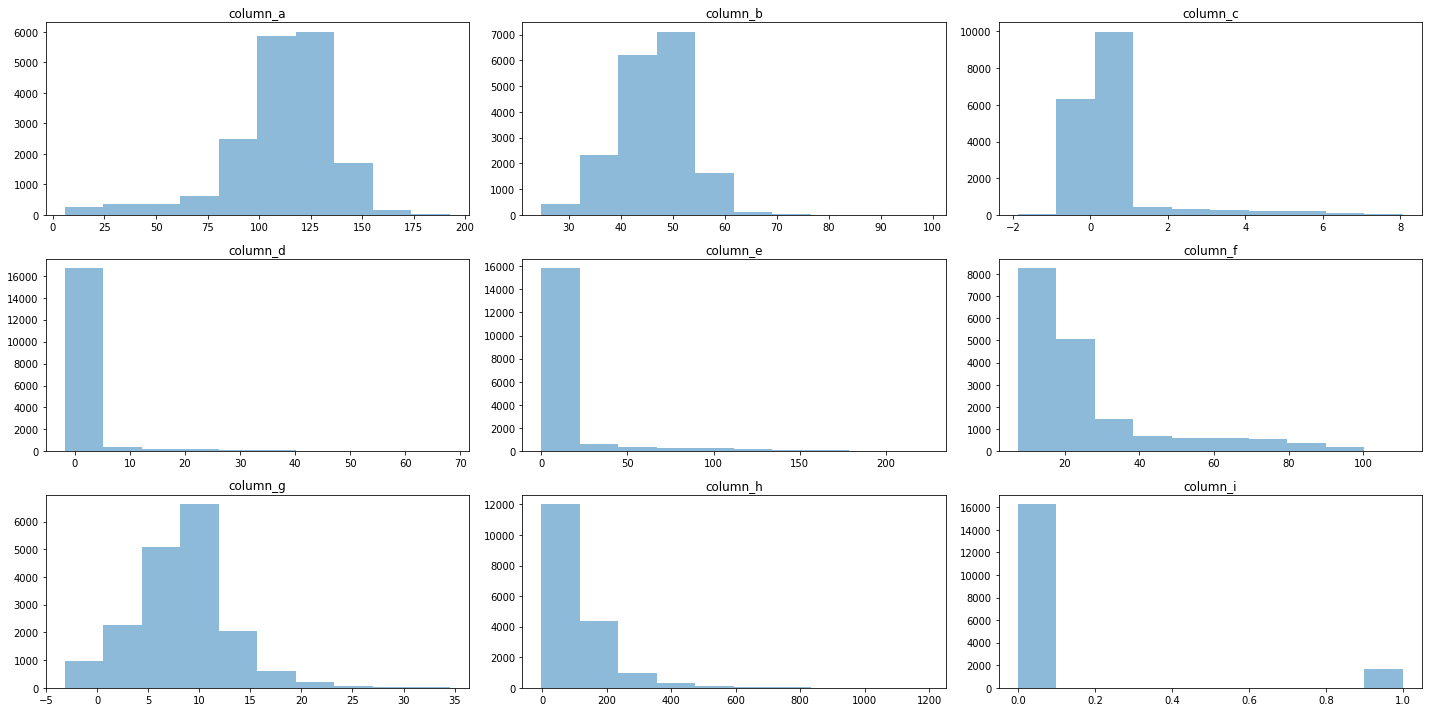

In [10]:
df.hist(grid=False, alpha=0.5, figsize=(20, 10))
plt.tight_layout()

## k-means cluster

In [11]:
# Define the features and the outcome.
X = df.iloc[:, :8]
y = df.iloc[:, 8]

In [12]:
#target counts
df['column_i'].value_counts()

0    16259
1     1639
Name: column_i, dtype: int64

In [13]:
df['column_i'].value_counts(normalize=True) * 100

0    90.842552
1     9.157448
Name: column_i, dtype: float64

### normalize data

In [14]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### divide into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std,
    y,
    test_size=0.9,
    random_state=42)

In [16]:
# Reduce data to two components for plotting
X_pca = PCA(2).fit_transform(X_train)

# Calculate predicted values.
y_pred_pca = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)


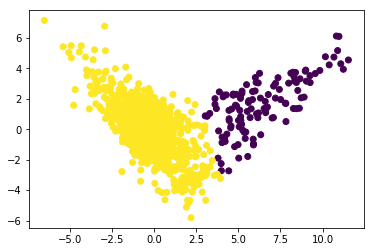

Comparing k-means clusters against the data:
column_i     0    1
row_0              
0            6  112
1         1614   57


In [17]:
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_pca, y_train))

### fit kmeans

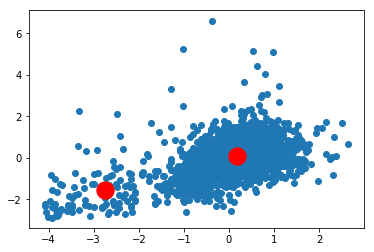

In [18]:
# using 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
pred_y = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [19]:
kmeans.cluster_centers_

array([[ 0.17096835,  0.1031284 , -0.22183606, -0.21418967, -0.15101402,
        -0.13848262,  0.11890269,  0.09412094],
       [-2.75246188, -1.53089021,  3.42676085,  3.27894234,  1.98290899,
         2.02971362, -1.55775043, -0.95747055]])

In [20]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [21]:
print(pd.crosstab(pred_y, y_train))

column_i     0    1
row_0              
0         1613   57
1            7  112


In [22]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
silhoueette_kmeans = silhouette_score(X_train, kmeans.labels_)

print(silhoueette_kmeans)

0.645321137216534


In [86]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)
    

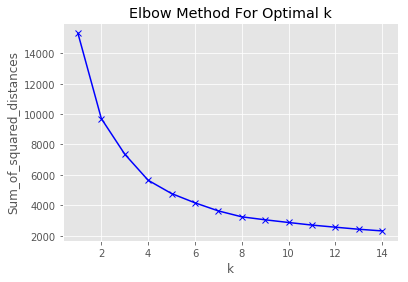

In [87]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

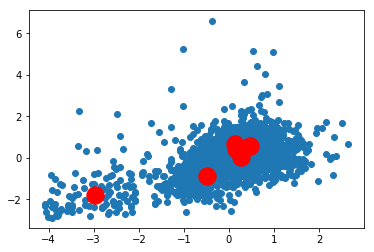

In [24]:
#using 6 clusters
kmeans6 = KMeans(n_clusters=6, init='k-means++', random_state=42)
pred_y = kmeans6.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans6.cluster_centers_[:, 0], 
            kmeans6.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [25]:
print(pd.crosstab(pred_y, y_train))

column_i    0   1
row_0            
0           1  97
1         638  12
2          96  24
3         452   3
4         371  32
5          62   1


In [26]:
# Calculate silhouette_score

silhouette_kmeans6 = silhouette_score(X_train, kmeans6.labels_)
print(silhouette_kmeans6)

0.2797401701682287


If the Silhouette index value is high, the object is well-matched to its own cluster and poorly matched to neighbouring clusters.

    -value close to 1, sample is well-clustered and already assigned to a very appropriate cluster;
    -value is about to 0, sample could be assign to another cluster closest to it;  sample lies equally far away from both the clusters; indicates overlapping clusters;
    -value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.

#### evaluation
Based on the silhouette_score, the algorithm with n_clusters = 2 clearly performs better than the n_clusters = 6 algorithm. 

### mini batch kmeans

#### mini batch kmeans with 'random' centroids

In [94]:
#initiate random centroids
# Each batch will be made up of 200 data points.
minibatch_random = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200,
    random_state=42)
minibatch_random.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini_random = minibatch_random.predict(X_train)



In [95]:
# Check the MiniBatch model against our earlier one.
print('Comparing k-means and minibatch_random k-means solutions:')
print(pd.crosstab(predict_mini_random, pred_y))

Comparing k-means and minibatch_random k-means solutions:
col_0   0    1    2    3    4   5
row_0                            
0      98  409  118   13  319   2
1       0  241    2  442   84  61


In [96]:
#finding the centroid
minibatch_random.cluster_centers_

array([[-0.23758219, -0.13816778,  0.21990473,  0.18133447,  0.23563698,
         0.39429257, -0.53237129, -0.49569916],
       [ 0.32592905,  0.28928914, -0.29275073, -0.25829266, -0.36461967,
        -0.64260148,  0.95545781,  0.9785815 ]])

In [97]:
# Calculate silhouette_score
silhoueette_minibatch_random = silhouette_score(X_train, minibatch_random.labels_)
print(silhoueette_minibatch_random)

0.1877967612313733


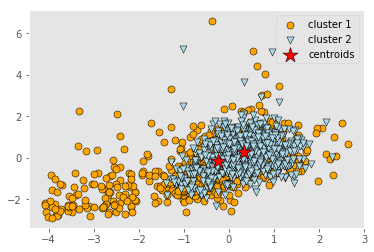

In [99]:
# plot the 2 clusters (random centroids)
plt.scatter(X_train[predict_mini_random == 0,0], X_train[predict_mini_random == 0, 1],
    s=50, c='orange', marker='o', edgecolor='black', label='cluster 1')
plt.scatter(X_train[predict_mini_random == 1, 0], X_train[predict_mini_random == 1, 1],
    s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 2')
# plot the centroids
plt.scatter(minibatch_random.cluster_centers_[:, 0], minibatch_random.cluster_centers_[:, 1],
    s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### mini batch kmeans with 'k-means++' centroids

In [31]:
#choosing centroid mean
minibatch_kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=2,
    batch_size=200,
    random_state=42)
X_train_mini = minibatch_kmeans.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini = minibatch_kmeans.predict(X_train)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and minibatch_kmeans solutions:')
print(pd.crosstab(predict_mini, pred_y))

Comparing k-means and minibatch_kmeans solutions:
col_0   0    1   2    3    4   5
row_0                           
0       0  650  98  455  396  63
1      98    0  22    0    7   0


In [32]:
#finding the centroid
minibatch_kmeans.cluster_centers_

array([[ 0.16811496,  0.10259877, -0.22882962, -0.22117777, -0.16083287,
        -0.14625193,  0.12233748,  0.09227433],
       [-2.66961058, -1.33128211,  3.2027072 ,  2.87143733,  1.88202561,
         1.96793122, -1.53641871, -0.95303873]])

In [33]:
print(pd.crosstab(predict_mini, predict_mini_random))

col_0    0    1
row_0          
0      808  854
1      127    0


In [34]:
# Calculate silhouette_score
silhoueette_minibatch_kmeans = silhouette_score(X_train, minibatch_kmeans.labels_)
print(silhoueette_minibatch_kmeans)

0.6374071313117781


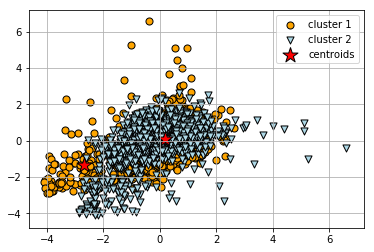

In [35]:
# plot the 2 clusters (kmeans++ centroids)
plt.scatter(X_train[:,0], X_train[:, 1], s=50, c='orange', marker='o', edgecolor='black',
    label='cluster 1')
plt.scatter(X_train[:, 1], X_train[:, 0], s=50, c='lightblue', marker='v', edgecolor='black',
    label='cluster 2')
# plot the centroids
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1],
    s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### evaluation
The MiniBatchKMeans initialized with 'k-means++' clearly outperforms the 'random' initiation. The Silhouette_score for the MiniBatchKMeans ('k-means++') algorithm are comparable to that of the KMeans (n-cluster=2) algorithm. 

### mean shift

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# set the bandwidth automatically
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
# Count our clusters.
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 13


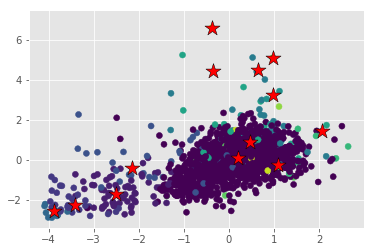

Comparing the assigned categories to the ones in the data:
col_0       0   1   2   3   4   5   6   7   8   9   10  11  12
column_i                                                      
0         1501   1   0  25   0  25   4  29  15  12   2   5   1
1           43  66  29  18  10   2   0   1   0   0   0   0   0


In [100]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
# plot the centroids
plt.scatter(
    ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [38]:
# Calculate silhouette_score
silhoueette_mean_shift = silhouette_score(X_train, ms.labels_)
print(silhoueette_mean_shift)

0.408356158542891


#### evaluation
The MeanShift algorithm shows improved performance over the KMeans(6 cluster) and the Minibatch(random initiation), but falls short of the perfomance of the KMeans(2 cluster) and the Minibatch(k-means++ initiation) algorithms. 

### spectral clustering

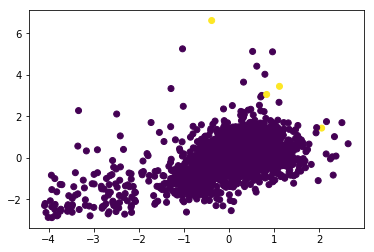

Comparing the assigned categories to the ones in the data:
col_0        0  1
column_i         
0         1615  5
1          169  0


In [39]:
from sklearn.cluster import SpectralClustering
# known clusters= 2
n_clusters=2
sc = SpectralClustering(n_clusters=n_clusters) # Declare and fit the model.
sc.fit(X_train)
sc_predict=sc.fit_predict(X_train) #Predicted clusters.
plt.scatter(X_train[:, 0], X_train[:, 1], c=sc_predict)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,sc_predict))

In [40]:
# Calculate silhouette_score
silhoueette_spectral_cluster = silhouette_score(X_train, sc.labels_)
print(silhoueette_spectral_cluster)

0.5985769053974651


#### evaluation
The SpectralClustering algorithm shows improved performance over the KMeans(6 cluster), the Minibatch(random initiation), and the MeanShift algorithms, but falls short of the perfomance of the KMeans(2 cluster) and the Minibatch(k-means++ initiation) algorithms. 

### affinity propagation

In [41]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# did not provide arguments to the model
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af_labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


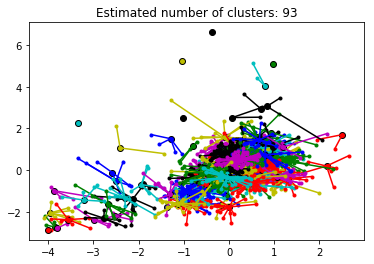

In [42]:
from itertools import cycle
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = af_labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

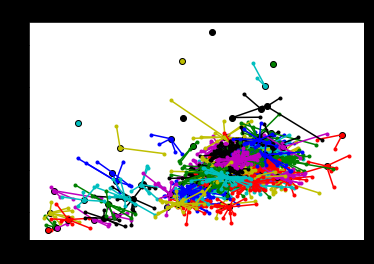

In [43]:
# Calculate silhouette_score
silhoueette_affinity_prop = silhouette_score(X_train, af.labels_)
print(silhouette_score(X_train, af.labels_))

0.1991367762506421


#### evaluation
The AffinityPropagation algorithm is one of the worst performing alogirithms, performing on slightly better than the lowest performing Minibatch(random initiation) algorithm. All other algorithms performed better. 

## evaluation of algorithms

In [44]:
#silhouette_score
print('Silhouette_scores as follows:')
print('KMeans, 2 clusters: ', silhoueette_kmeans)
print('KMeans, 6 clusters: ', silhouette_kmeans6)
print('Minibatch, random initiation: ', silhoueette_minibatch_random)
print('Minibatch, k-means++ initiation: ', silhoueette_minibatch_kmeans)
print('MeanShift: ', silhoueette_mean_shift)
print('SpectralClustering: ', silhoueette_spectral_cluster)
print('AffinityPropagation: ', silhoueette_affinity_prop)

Silhouette_scores as follows:
KMeans, 2 clusters:  0.645321137216534
KMeans, 6 clusters:  0.2797401701682287
Minibatch, random initiation:  0.194556763821857
Minibatch, k-means++ initiation:  0.6374071313117781
MeanShift:  0.408356158542891
SpectralClustering:  0.5985769053974651
AffinityPropagation:  0.1991367762506421


In [45]:
# Make sure the number of rows divides evenly into four samples.
rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

X = df.iloc[:, :8]
y = df.iloc[:, 8]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [46]:
# Split the data into four equally-sized samples. First break in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time 
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. Use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    nclust = 2 
# Generate cluster predictions and store them for clusters 2 
    pred = KMeans(n_clusters=nclust, init='k-means++', random_state=42).fit_predict(data[0])
    ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [47]:
ypred.head()

,pca_f1_sample0,pca_f2_sample0,clust2_sample0,pca_f1_sample1,pca_f2_sample1,clust2_sample1,pca_f1_sample2,pca_f2_sample2,clust2_sample2,pca_f1_sample3,pca_f2_sample3,clust2_sample3
0,-0.588303,0.270394,0,0.001121,0.408778,0,3.165809,-3.314720,1,1.758840,0.516259,0
1,-1.128355,-0.710362,0,-0.650756,0.956585,0,0.459520,-2.639234,0,-0.661268,-0.114247,0
2,-0.381449,0.766446,0,-0.818574,-0.897137,0,-4.623472,3.477752,0,-0.067448,0.582022,0
3,-0.434124,-0.072929,0,-1.283544,0.739116,0,2.737269,-3.349925,1,5.908476,1.933604,1
4,0.152861,-0.023546,0,-1.769431,-0.360816,0,-1.130472,-0.973593,0,1.159226,-2.589655,0


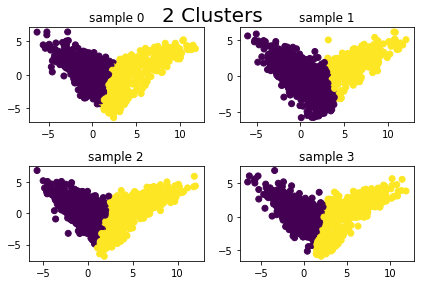

In [48]:
cluster = 2

#Make a grid of subplots.
f, axarr = plt.subplots(2, 2)
    
#Make a plot for each sample.
for i in range(4):
    
    # PCA-created features
    x_sub = ypred['pca_f1_sample{}'.format(i)]
    y_sub = ypred['pca_f2_sample{}'.format(i)]
        
    # Cluster assignments.
    c = ypred['clust{}_sample{}'.format(cluster, i)]
        
    # Assign the subplot to its place on the grid.
    rows = int(np.floor(i / 2))
    cols = i % 2
    axarr[rows, cols].scatter(x_sub, y_sub, c=c)
    axarr[rows, cols].set_title('sample {}'.format(i))
    
    
# Space out the plots so that the headings don't overlap axis values.
plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
plt.tight_layout()
plt.show()
print('\n')

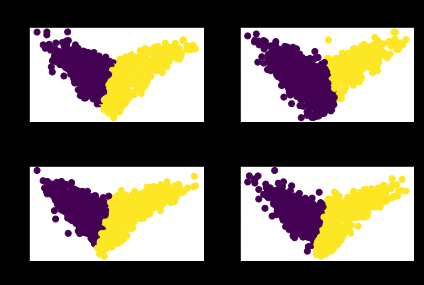

In [49]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1
column_i,,
0,15482,775
1,358,1281


## modeling with knn

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error

In [101]:
X = df.iloc[:, :8]
y = df.iloc[:, 8]

n_neighbors = 6

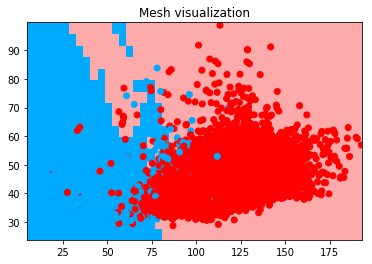

In [51]:
from matplotlib.colors import ListedColormap
X = X.iloc[:,:2].values
y = y
h = 4.0

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

clf = KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1,  X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1,  X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Mesh visualization')
plt.show()

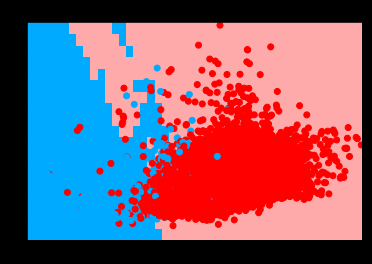

In [52]:
# Define the features and the outcome.
X = df.iloc[:, :8]
y = df.iloc[:, 8]

#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_std,
    y,
    test_size=0.9,
    random_state=42)

In [53]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.17985045145497347
RMSE value for k=  2 is: 0.16109453646931432
RMSE value for k=  3 is: 0.15500587291128723
RMSE value for k=  4 is: 0.15560551102236928
RMSE value for k=  5 is: 0.1552060096930452
RMSE value for k=  6 is: 0.1569957601830869
RMSE value for k=  7 is: 0.15400128764965743
RMSE value for k=  8 is: 0.15580487755003117
RMSE value for k=  9 is: 0.15500587291128723
RMSE value for k=  10 is: 0.15758782674752478
RMSE value for k=  11 is: 0.15620284723421415
RMSE value for k=  12 is: 0.15837380582153718
RMSE value for k=  13 is: 0.1569957601830869
RMSE value for k=  14 is: 0.15856969186526623
RMSE value for k=  15 is: 0.15778468856912387
RMSE value for k=  16 is: 0.1599341765639168
RMSE value for k=  17 is: 0.15876533622328587
RMSE value for k=  18 is: 0.16167159337312723
RMSE value for k=  19 is: 0.1595455145639735
RMSE value for k=  20 is: 0.16109453646931432


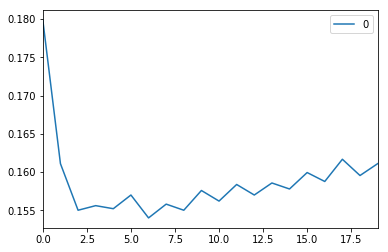

In [54]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [55]:
neighbors = KNeighborsClassifier(n_neighbors=6)

neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [56]:
knn_train_accuracy = neighbors.score(X_train, y_train) 
knn_test_accuracy = neighbors.score(X_test, y_test) 

print('knn_train_accuracy: ' , knn_train_accuracy)
print('knn_test_accuracy: ' , knn_test_accuracy)

knn_train_accuracy:  0.9815539407490218
knn_test_accuracy:  0.9753523312845347


In [57]:
from sklearn.model_selection import cross_val_score

#train model with cv of 5 
cv_scores = cross_val_score(neighbors, X, y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.97039106 0.96955307 0.97597094 0.97373568 0.97288988]
cv_scores mean:0.972508127731128


### tuning with gird search

In [58]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(neighbors.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}


In [59]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski', 'euclidean', 'manhattan']}

#use gridsearch to test values 
knn_gscv = GridSearchCV(knn2, param_grid, cv = 5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
print("Best Hyper Parameters:\n",knn_gscv.best_params_)


Best Hyper Parameters:
 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [61]:
#Prediction
prediction=knn_gscv.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.09126466753585398
Confusion Metrix:
 [[    0     0]
 [14637  1470]]


In [62]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9741841752346894

In [63]:
gscv_fit = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')

gscv_fit.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [64]:
gscv_fit_train_accuracy = gscv_fit.score(X_train, y_train) 
gscv_fit_test_accuracy = gscv_fit.score(X_test, y_test) 

print('gscv_fit_train_accuracy: ' , gscv_fit_train_accuracy)
print('gscv_fit_test_accuracy: ' , gscv_fit_test_accuracy)

gscv_fit_train_accuracy:  1.0
gscv_fit_test_accuracy:  0.9756006705159248


In [65]:
from sklearn.model_selection import cross_val_score

#train model with cv of 5 
gscv_cv_scores = cross_val_score(gscv_fit, X, y, cv=5)
#print each cv score (accuracy) and average them
print(gscv_cv_scores)
print('gscv_cv_scores mean:{}'.format(np.mean(gscv_cv_scores)))

[0.97150838 0.97430168 0.97625035 0.97373568 0.97512577]
gscv_cv_scores mean:0.9741843708137872


### tune with randomized search

In [66]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski', 'euclidean', 'manhattan']}

pprint(random_grid)

{'metric': ['minkowski', 'euclidean', 'manhattan'],
 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'weights': ['uniform', 'distance']}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(knn, random_grid, cv = 5)
# Fit the random search model
knn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [68]:
knn_random.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}

In [69]:
#check mean score for the top performing value of n_neighbors
knn_random.best_score_

0.9782001117942984

In [70]:
knn_random_fit = KNeighborsClassifier(n_neighbors=8, metric='minkowski', weights='distance')

knn_random_fit.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='distance')

In [71]:
knn_random_fit_train_accuracy = knn_random_fit.score(X_train, y_train) 
knn_random_fit_test_accuracy = knn_random_fit.score(X_test, y_test) 

print('knn_random_fit_train_accuracy: ' , knn_random_fit_train_accuracy)
print('knn_random_fit_test_accuracy: ' , knn_random_fit_test_accuracy)

knn_random_fit_train_accuracy:  1.0
knn_random_fit_test_accuracy:  0.9761594337865525


In [72]:
#train model with cv of 5 
knn_random_cv_scores = cross_val_score(knn_random_fit, X, y, cv=5)
#print each cv score (accuracy) and average them
print(knn_random_cv_scores)
print('knn_random_cv_scores mean:{}'.format(np.mean(knn_random_cv_scores)))

[0.97067039 0.97011173 0.97345627 0.97261805 0.97344885]
knn_random_cv_scores mean:0.9720610598899807


In [73]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = KNeighborsClassifier(n_neighbors=6)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_gscv = gscv_fit
gscv_accuracy = evaluate(best_gscv, X_test, y_test)

best_random = knn_random_fit
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0246 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0244 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0238 degrees.
Accuracy = -inf%.
Improvement of nan%.


C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


Model Performance
Average Error: 0.0246 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0244 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0238 degrees.
Accuracy = -inf%.
Improvement of nan%.


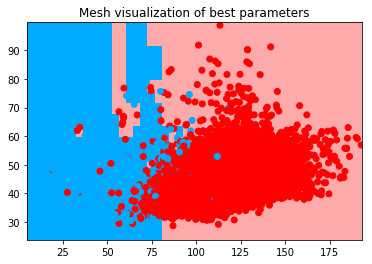

In [74]:
#plot knn model with 'best paramenters'
X = df.iloc[:, :8]
y = df.iloc[:, 8]

n_neighbors = 5

X = X.iloc[:, :2].values
y = y
#h = 0.02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

clf = KNeighborsClassifier(n_neighbors, weights='distance', metric= 'manhattan')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1,  X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1,  X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Mesh visualization of best parameters')
plt.show()

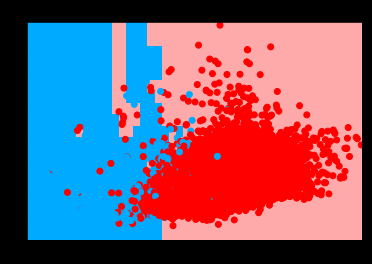

## data story

In [75]:
df.groupby('column_i').describe()

column_a                                                            \
            count        mean        std        min         25%         50%   
column_i                                                                      
0         16257.0  116.566513  17.470768  17.210938  105.257812  117.265625   
1          1639.0   56.690608  30.007707   5.812500   31.777344   54.296875   

                                 column_b                                  \
                 75%         max    count       mean       std        min   
column_i                                                                    
0         128.289062  192.617188  16257.0  47.336971  6.175733  28.698714   
1          79.277344  139.257812   1639.0  38.710598  8.033614  24.772042   

                                                     column_c            \
                25%        50%        75%        max    count      mean   
column_i                                                                  
0         43.383825  47.484634  51.315050  98.778911  16257.0  0.210367   
1         32.284803  37.341297  43.759278  83.796909   1639.0  3.130655   

                                                                     column_d  \
               std       min       25%       50%       75%       max    count   
column_i                                                                        
0         0.334495 -1.876011  0.008648  0.186605  0.392854  4.785786  16257.0   
1         1.872861 -0.094888  1.556038  2.961258  4.586930  8.069522   1639.0   

                                                                          \
               mean        std       min       25%        50%        75%   
column_i                                                                   
0          0.380887   1.027847 -1.791886 -0.222009   0.124358   0.663490   
1         15.553576  13.997200 -1.139069  3.805492  11.609644  24.881853   

                    column_e                                             \
                max    count       mean        std       min        25%   
column_i                                                                  
0         24.872429  16257.0   8.852646  24.372246  0.213211   1.857023   
1         68.101622   1639.0  49.825995  45.287932  0.486622  12.759615   

                                           column_f                        \
                50%        75%         max    count       mean        std   
column_i                                                                    
0          2.635452   4.226589  223.392140  16257.0  23.286045  16.649099   
1         33.494983  78.313545  199.577759   1639.0  56.468963  19.731080   

                                                                column_g  \
               min        25%        50%        75%         max    count   
column_i                                                                   
0         7.370432  14.138799  17.618420  24.513579  110.642211  16257.0   
1         7.658623  43.333643  59.367088  70.985965  109.655345   1639.0   

                                                                      \
              mean       std      min       25%       50%        75%   
column_i                                                               
0         8.863247  4.238083 -3.13927  6.615413  8.760010  10.935336   
1         2.757069  3.105945 -1.86232  0.756451  1.918327   3.709978   

                    column_h                                               \
                max    count        mean         std       min        25%   
column_i                                                                    
0         34.539844  16257.0  113.625976  106.724745 -1.976976  47.595199   
1         30.883882   1639.0   17.931728   50.896263 -1.874683  -0.228294   

                                              
                50%         75%          max  
column_i                                      
0         90.674592  145.838781  

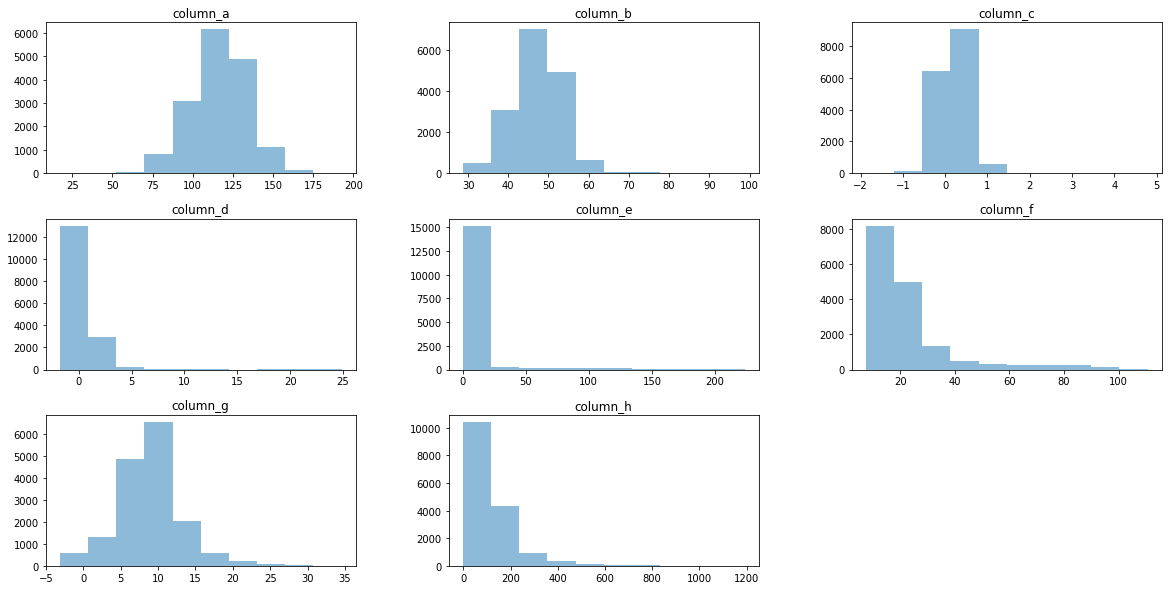

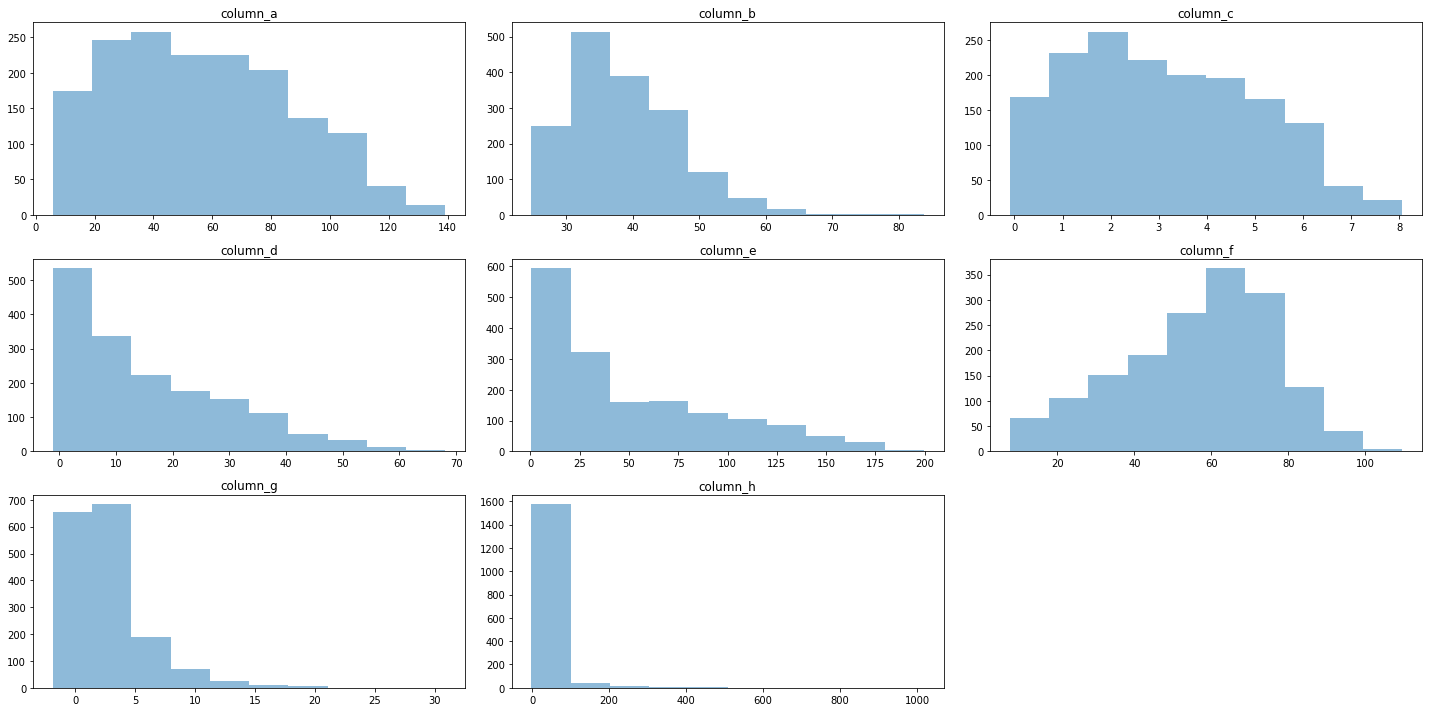

In [76]:
df.groupby('column_i').hist(grid=False, alpha=0.5, figsize=(20, 10))
#plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()
plt.show()

#### create 'target' column with names for plotting

In [77]:
df_plot = df.copy()

In [78]:
df_plot['target'] = np.where(df_plot['column_i']== 0, 'RFI', 'Pulsar')

In [79]:
df_plot = df_plot.drop(['column_i'], axis=1)

In [80]:
#create df where columns are grouped by target
# this df creates some problems since it is 'grouped by'
df_target = df_plot.groupby('target')

In [81]:
df_plot.columns = df_plot.columns.str.replace('column_', 'feature_')

In [82]:
df_plot.groupby('target').describe()

feature_a                                                            \
           count        mean        std        min         25%         50%   
target                                                                       
Pulsar    1639.0   56.690608  30.007707   5.812500   31.777344   54.296875   
RFI      16257.0  116.566513  17.470768  17.210938  105.257812  117.265625   

                               feature_b                                  \
               75%         max     count       mean       std        min   
target                                                                     
Pulsar   79.277344  139.257812    1639.0  38.710598  8.033614  24.772042   
RFI     128.289062  192.617188   16257.0  47.336971  6.175733  28.698714   

                                                   feature_c            \
              25%        50%        75%        max     count      mean   
target                                                                   
Pulsar  32.284803  37.341297  43.759278  83.796909    1639.0  3.130655   
RFI     43.383825  47.484634  51.315050  98.778911   16257.0  0.210367   

                                                                   feature_d  \
             std       min       25%       50%       75%       max     count   
target                                                                         
Pulsar  1.872861 -0.094888  1.556038  2.961258  4.586930  8.069522    1639.0   
RFI     0.334495 -1.876011  0.008648  0.186605  0.392854  4.785786   16257.0   

                                                                        \
             mean        std       min       25%        50%        75%   
target                                                                   
Pulsar  15.553576  13.997200 -1.139069  3.805492  11.609644  24.881853   
RFI      0.380887   1.027847 -1.791886 -0.222009   0.124358   0.663490   

                  feature_e                                             \
              max     count       mean        std       min        25%   
target                                                                   
Pulsar  68.101622    1639.0  49.825995  45.287932  0.486622  12.759615   
RFI     24.872429   16257.0   8.852646  24.372246  0.213211   1.857023   

                                         feature_f                        \
              50%        75%         max     count       mean        std   
target                                                                     
Pulsar  33.494983  78.313545  199.577759    1639.0  56.468963  19.731080   
RFI      2.635452   4.226589  223.392140   16257.0  23.286045  16.649099   

                                                              feature_g  \
             min        25%        50%        75%         max     count   
target                                                                    
Pulsar  7.658623  43.333643  59.367088  70.985965  109.655345    1639.0   
RFI     7.370432  14.138799  17.618420  24.513579  110.642211   16257.0   

                                                                               \
            mean       std      min       25%       50%        75%        max   
target                                                                          
Pulsar  2.757069  3.105945 -1.86232  0.756451  1.918327   3.709978  30.883882   
RFI     8.863247  4.238083 -3.13927  6.615413  8.760010  10.935336  34.539844   

       feature_h                                                          \
           count        mean         std       min        25%        50%   
target                                                                     
Pulsar    1639.0   17.931728   50.896263 -1.874683  -0.228294   2.585145   
RFI      16257.0  113.625976  106.724745 -1.976976  47.595199  90.674592   

                                 
               75%          max  
target                           
Pulsar   13.469687  1017.383180  
RFI     145.838781  1191.000837

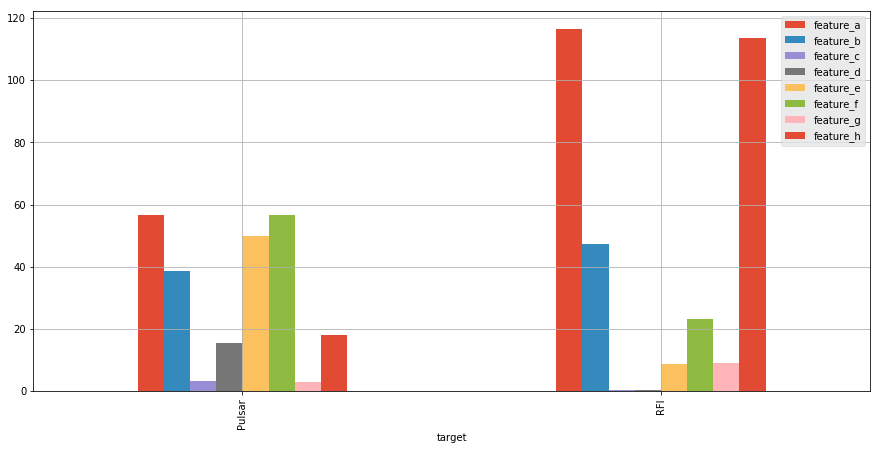

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
plt.style.use('ggplot')
df_plot.groupby(['target']).mean().plot(ax=ax, kind='bar')

Text(0.5, 1.0, 'features by target')

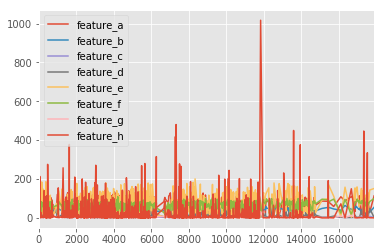

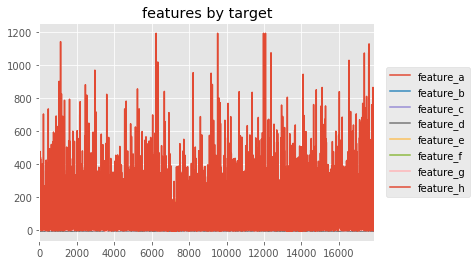

In [85]:
df_target.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.title('features by target')

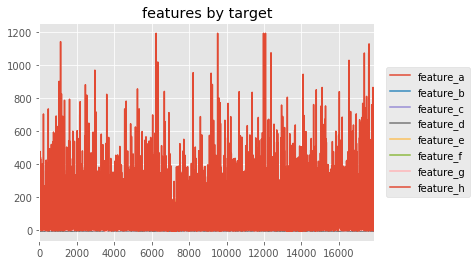

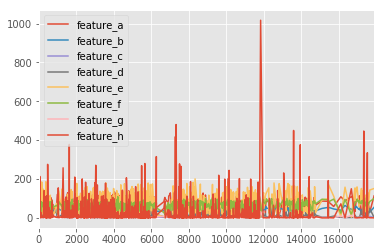

### observations on the data

The Pulsar cluster demonstrates visible differences from the radio frequency interference (RFI) cluster. Specifically, features 'a' and 'h' are significantly higher in the RFI cluster than in the Pulsar cluster. When observed on the line graph above, the 'a' and 'h' features completely obscure the other features on the RFI plot. 

Conversely, the features 'e' and 'f' are much higher in the Pulsar cluster than the RFI cluster. Lastly, features 'c' and 'd', while low in the Pulsar cluster, barely register in the RFI cluster. 

While it's difficult to know exactly how each feature contributes to the accuracy of the clustering algorithm, it appears that the differences between features 'a' and 'h' could be sufficient to distinguish the target cluster (Pulsar) from the non-target cluster (RFI). 

## clustering algorithms 
### What are the advantages of each?

**K-means:**
    + simple to implement
    + scales to large data sets
    + speed
    + generalizes to clusters of different 
    shapes/sizes
    - choosing k manually
    - dependent on initial values; may not be 
    consistent
    - clustering outliers

**Mean-Shift:**
    + does not require selection of number of 
    clusters
    + more versatile than k-means
    + works where many clusters are suspected
    + clusters can be different sizes
    - selection of bandwidth
    - slow (runtime increased with square of 
    size of input)
    

**Spectral clustering:**
    + can identify clusters with non-flat 
    geometry
    - provide number of clusters
    - slow; works best with smaller k

**Affinity propagation:**
    + clusters can be uneven in size 
    + use non-flat geometry
    + chooses number of clusters based on data
    - slow, memory intensive

### How do clustering and modeling compare? 
The main difference between the clustering algorithms and clustering model is the difference between "unsupervised" and "supervised" learning. 



Unsupervised learning is the process of looking at data for structures *within the data* without them being tied down to a specific outcome. Supervised learning, on the other hand, IS tied to a specific outcome. The first is looking for insights into the data where the second is looking for insights into the outcome. 

### Why would you want to use one over the other?
Obviously the choice between algorithms vs models would be made on the type of data available and the purpose of the data exploration, as explained above. 

### Any weak points or shortcomings of your model.
Based on the silhouette scores, the k-means algorithm with 2-clusters specified is the best performing algorithm, followed very closely by the minibatch algorithm with kmeans++ initiation. The main weakness of these two algorithms is the need to identify the number of clusters for the algorithm to identify. 

Although there is a process to help determine the number of clusters based on the error/inertia of the algorithm (sum of squared distances), the silhouette score does not improve with the selection of a k with lower error scores. For this data in particular, the algorithms perfom much worse than the knn-model. 

# questions?

In [ ]:
pip install RISE

In [ ]:
jupyter-nbextension install rise --py --sys-prefix